In [1]:
from utils import *

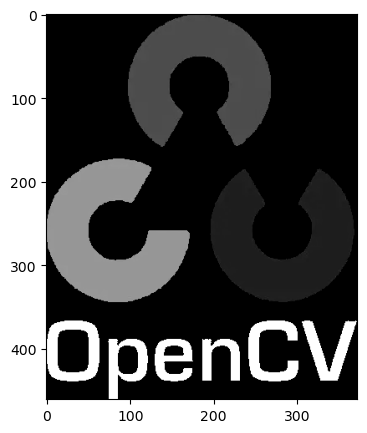

In [2]:
img = readImage('./input/opencv.png')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img, cmap='gray')

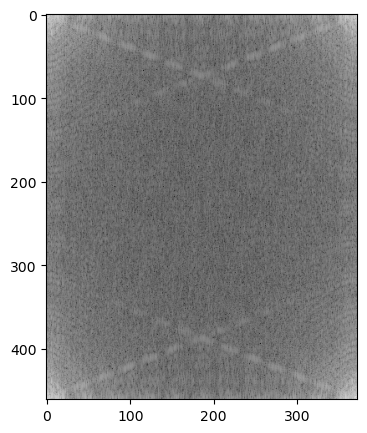

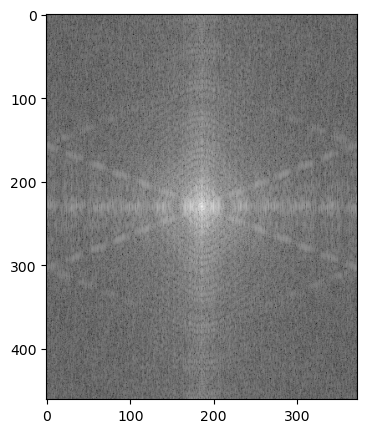

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_f = 20*np.log(np.abs(f))
showImage(magnitude_spectrum_f, cmap='gray')
showImage(magnitude_spectrum, cmap='gray')


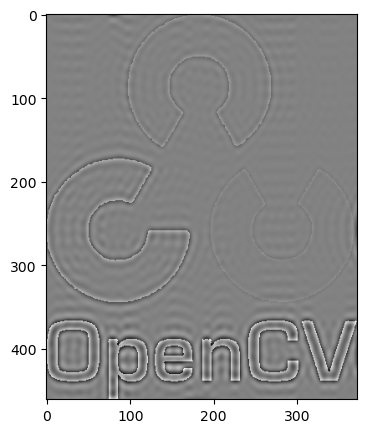

In [4]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
showImage(img_back, cmap='gray')

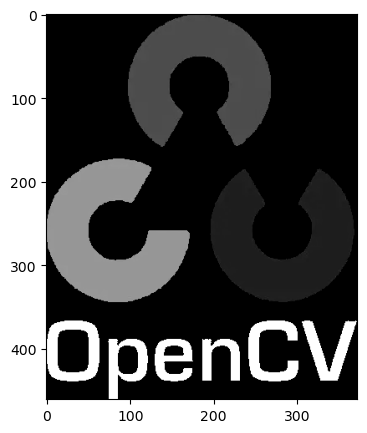

In [5]:
showImage(img, cmap='gray')

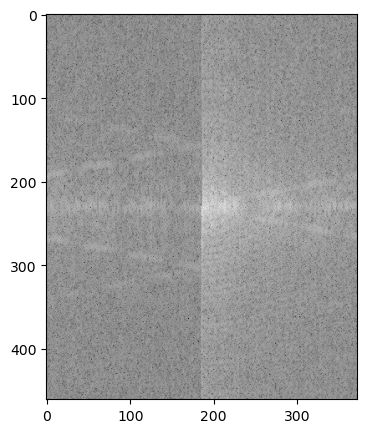

In [6]:
f = cv.dft(img.astype(np.float32))
fshift = np.fft.fftshift(f)
mf = 20*np.log(np.abs(fshift))
showImage(mf, cmap="gray")

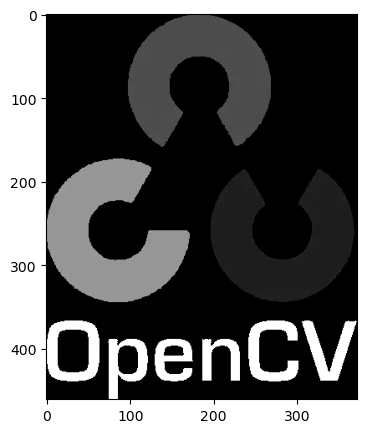

In [7]:
img_back = cv.idft(f)
showImage(img_back, cmap='gray')

In [8]:
cv.getOptimalDFTSize(151)

160

In [15]:
# 没有缩放参数的简单均值滤波器
mean_filter = np.ones((3,3))
# 创建高斯滤波器
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# 不同的边缘检测滤波器
# x方向上的scharr
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# x方向上的sobel
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# y方向上的sobel
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# 拉普拉斯变换
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']

In [16]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

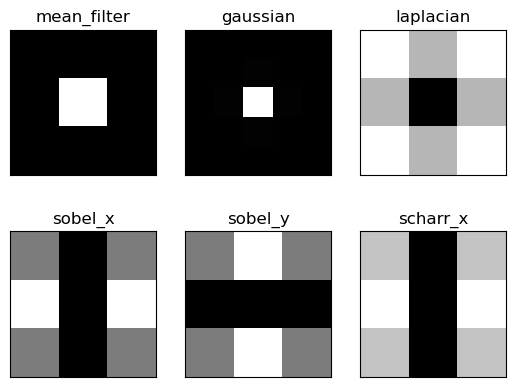

In [17]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()